In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

In [3]:
def probabilitySimplified1(xy, phase, omegax, omegay, A, C):
    x, y = xy
    return A*1/2*(np.cos(omegax*x-omegay*y-phase))**2 + C

In [4]:
# Import data from a CSV file
file_path = 'Single photon interference.csv'  # Replace with the actual path to your CSV file
data = pd.read_csv(file_path, header=None)

In [6]:
# Extracting the data
entries = np.array(data.values.tolist())
zdata = np.mean(entries[:,1:], axis = 1)
zerr = np.std(entries[:,1:], axis = 1, ddof = 2)

# error multiplier
zerrmult = 3
zerr = zerr*zerrmult

xydata = entries[:,0]

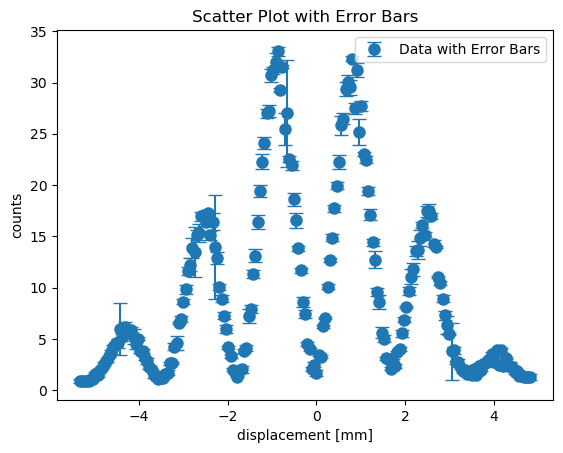

In [9]:
plt.errorbar(xydata, zdata, yerr=zerr, fmt='o', markersize=8, capsize=5, label='Data with Error Bars')

# Add labels and title
plt.xlabel('displacement [mm]')
plt.ylabel('counts')
plt.title('Scatter Plot with Error Bars')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [109]:
# Curve fitting probabilityGeneralized()

initial_guess = [0, np.pi/4, np.pi/4, 0, 0, 1, 0]  # Initial guess for the parameters

# with sigma (standard error) taken into account [comment/uncomment following line]
# paramsG, covarianceG, infodictG, mesgG, ierG = curve_fit(probabilityGeneralized, np.transpose(xydata), zdata, p0 = initial_guess, sigma = zerr, absolute_sigma = True, bounds = ((-0.05*np.pi, 0.97*np.pi/4, 0.97*np.pi/4, -0.1*np.pi, -np.pi, -np.Inf, -np.Inf), (0.05*np.pi, 1.03*np.pi/4, 1.03*np.pi/4, 0.1*np.pi, np.pi, np.Inf, np.Inf)), full_output = True)

# ignoring sigma (standard error) [comment/uncomment following line], for some reason this gives a nicer-looking plot. see plots below
paramsG, covarianceG, infodictG, mesgG, ierG = curve_fit(probabilityGeneralized, np.transpose(xydata), zdata, bounds = ((-np.pi, -np.pi, -np.pi, -np.pi, -np.pi, -np.Inf, -np.Inf), (np.pi, np.pi, np.pi, np.pi, np.pi, np.Inf, np.Inf)), full_output = True)

print(mesgG)

perrG = np.sqrt(np.diag(covarianceG))

print("det cov = " + str(np.linalg.det(covarianceG)))

print("thetalaser = " + str(np.mod(paramsG[0]*180/np.pi, 360)) + " deg, thetaBBO = " + str(paramsG[1]*180/np.pi) + " deg, thetabiref = " + str(np.mod(paramsG[2]*180/np.pi, 360)) + " deg, phi = " + str(np.mod(paramsG[3]*180/np.pi, 360)) + " deg, phil = " + str(np.mod(paramsG[4]*180/np.pi, 360)) + " deg, A = " + str(paramsG[5]) + " counts, C = " + str(paramsG[6]) + " counts")
print("thetalasererr = " + str(perrG[0]*180/np.pi) + " deg, thetaBBOerr = " + str(perrG[1]*180/np.pi) + ", thetabireferr = " + str(perrG[2]*180/np.pi) + ", phierr = " + str(perrG[3]*180/np.pi) + ", philerr = " + str(perrG[4]*180/np.pi) + ", Aerr = " + str(perrG[5]) + ", Cerr = " + str(perrG[6]))

# , bounds = ((-np.pi, -np.pi, -np.pi, -np.pi, -np.pi, -np.Inf, -np.Inf), (np.pi, np.pi, np.pi, np.pi, np.pi, np.Inf, np.Inf))
# , bounds = ((-0.1*np.pi, 0.97*np.pi/4, 0.97*np.pi/4, -0.1*np.pi, -np.pi, -np.Inf, -np.Inf), (0.1*np.pi, 1.03*np.pi/4, 1.03*np.pi/4, 0.1*np.pi, np.pi, np.Inf, np.Inf))
# , bounds = ((-0.02*np.pi, 0.97*np.pi/4, 0.97*np.pi/4, -0.02*np.pi, -np.pi, -np.Inf, 0.8), (0.02*np.pi, 1.03*np.pi/4, 1.03*np.pi/4, 0.02*np.pi, np.pi, np.Inf, 1))

`ftol` termination condition is satisfied.
det cov = 1190951770470.2087
thetalaser = 338.1463324933026 deg, thetaBBO = 36.48026792145636 deg, thetabiref = 6.335624310388413 deg, phi = 348.95868187475963 deg, phil = 66.52857764755498 deg, A = 1.9877145533021607 counts, C = 0.08157973149753679 counts
thetalasererr = 60439055.469956346 deg, thetaBBOerr = 11.29196690510432, thetabireferr = 56821534.418405935, phierr = 60862894.67078266, philerr = 116204360.29653108, Aerr = 0.15949956377569077, Cerr = 0.037395483089782675


In [110]:
# Curve fitting probability()

initial_guess = [np.pi/4, np.pi/4, 0, 0, 1, 0]  # Initial guess for the parameters

# with sigma (standard error) taken into account
# params, covariance, infodict, mesg, ier = curve_fit(probability, np.transpose(xydata), zdata, p0 = initial_guess, sigma = zerr, absolute_sigma = True, full_output = True)

# ignoring sigma (standard error), for some reason this gives a nicer-looking plot. see plots below
params, covariance, infodict, mesg, ier = curve_fit(probability, np.transpose(xydata), zdata, full_output = True)

print(mesg)

perr = np.sqrt(np.diag(covariance))

print("det cov = " + str(np.linalg.det(covariance)))

print("thetaBBO = " + str(params[0]*180/np.pi) + " deg, thetabiref = " + str(params[1]*180/np.pi) + " deg, phi = " + str(np.mod(params[2]*180/np.pi, 360)) + " deg, phil = " + str(np.mod(params[3]*180/np.pi, 360)) + " deg, A = " + str(params[4]) + " counts, C = " + str(params[5]) + " counts")
print("thetaBBOerr = " + str(perr[0]*180/np.pi) + ", thetabireferr = " + str(perr[1]*180/np.pi) + ", phierr = " + str(perr[2]*180/np.pi) + ", philerr = " + str(perr[3]*180/np.pi) + ", Aerr = " + str(perr[4]) + ", Cerr = " + str(perr[5]))


# bounds (to be copy-pasted) <-- some elaborate fine-tuning
# , bounds = ((-np.pi, -np.pi, -np.pi, -np.pi, -np.Inf, -np.Inf), (np.pi, np.pi, np.pi, np.pi, np.Inf, np.Inf))
# , bounds = ((0.95*np.pi/4, 0.95*np.pi/4, -0.05*np.pi, -0.05*np.pi, -np.Inf, -np.Inf), (1.05*np.pi/4, 1.05*np.pi/4, 0.05*np.pi, 0.05*np.pi, np.Inf, np.Inf))
# , bounds = ((0.97*np.pi/4, 0.97*np.pi/4, -np.pi, -np.pi, -np.Inf, -np.Inf), (1.03*np.pi/4, 1.03*np.pi/4, np.pi, np.pi, np.Inf, np.Inf))
# , bounds = ((0.97*np.pi/4, 0.97*np.pi/4, -0.1*np.pi, -0.1*np.pi, -np.Inf, -np.Inf), (1.03*np.pi/4, 1.03*np.pi/4, 0.1*np.pi, 0.1*np.pi, np.Inf, np.Inf))

The relative error between two consecutive iterates is at most 0.000000
det cov = 51950.72607218439
thetaBBO = 45.06648814298623 deg, thetabiref = 3.233856679474646 deg, phi = 335.8410045081508 deg, phil = 359.87624168395996 deg, A = 1.9465294997749836 counts, C = 0.08865837989524475 counts
thetaBBOerr = 13.691440551022115, thetabireferr = 5383898.82213003, phierr = 26753.089429822827, philerr = 34755.00911402456, Aerr = 0.185446987682679, Cerr = 0.040485403982515385


In [111]:
# Curve fitting probabilitySimplified()

initial_guess = [1, 0]  # Initial guess for the parameters

# with sigma (standard error) taken into account [comment/uncomment follinwg line]
# paramsS, covarianceS, infodictS, mesgS, ierS = curve_fit(probabilitySimplified, np.transpose(xydata), zdata, p0 = initial_guess, sigma = zerr, absolute_sigma = True, full_output = True)

# ignoring sigma (standard error) [comment/uncomment following line], for some reason this gives a nicer-looking plot. see plots below
paramsS, covarianceS, infodictS, mesgS, ierS = curve_fit(probabilitySimplified, np.transpose(xydata), zdata, full_output = True)

print(mesgS)

perrS = np.sqrt(np.diag(covarianceS))

print("det cov = " + str(np.linalg.det(covarianceS)))

print("A = " + str(paramsS[0]) + " counts, C = " + str(paramsS[1]) + " counts")
print("Aerr = " + str(perrS[0]) + ", Cerr = " + str(perrS[1]))

Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000 and the relative error between two consecutive iterates is at 
  most 0.000000
det cov = 9.122105955712249e-07
A = 1.83452781706471 counts, C = 0.1161087864162339 counts
Aerr = 0.07310127301286833, Cerr = 0.022465348252905117


In [112]:
# Curve fitting probabilityGeneralized1()

initial_guess = [0, np.pi/4, np.pi/4, 0, 0, 1, 0, 1, 1, 0, 0]  # Initial guess for the parameters

# with sigma (standard error) taken into account [comment/uncomment following line]
paramsG1, covarianceG1, infodictG1, mesgG1, ierG1 = curve_fit(probabilityGeneralized1, np.transpose(xydata), zdata, sigma = zerr, absolute_sigma = True, bounds = ((-0.02*np.pi, 0.98*np.pi/4, 0.98*np.pi/4, -np.pi, -np.pi, -np.Inf, -np.Inf, 0.85, 0.85, -np.pi, -np.pi), (0.02*np.pi, 1.02*np.pi/4, 1.02*np.pi/4, np.pi, np.pi, np.Inf, np.Inf, 1.15, 1.15, np.pi, np.pi)), full_output = True)

# full bounds
# paramsG1, covarianceG1, infodictG1, mesgG1, ierG1 = curve_fit(probabilityGeneralized1, np.transpose(xydata), zdata, sigma = zerr, absolute_sigma = True, bounds = ((-np.pi, -np.pi, -np.pi, -np.pi, -np.pi, -np.Inf, -np.Inf, 0.85, 0.85, -np.pi, -np.pi), (np.pi, np.pi, np.pi, np.pi, np.pi, np.Inf, np.Inf, 1.15, 1.15, np.pi, np.pi)), full_output = True)

# ignoring sigma (standard error) [comment/uncomment following line], for some reason this gives a nicer-looking plot. see plots below
# paramsG1, covarianceG1, infodictG1, mesgG1, ierG1 = curve_fit(probabilityGeneralized1, np.transpose(xydata), zdata, bounds = ((-0.02*np.pi, 0.98*np.pi/4, 0.98*np.pi/4, -np.pi, -np.pi, -np.Inf, -np.Inf, 0.85, 0.85, -np.pi, -np.pi), (0.02*np.pi, 1.02*np.pi/4, 1.02*np.pi/4, np.pi, np.pi, np.Inf, np.Inf, 1.15, 1.15, np.pi, np.pi)), full_output = True)

print(mesgG1)

perrG1 = np.sqrt(np.diag(covarianceG1))

print("det cov = " + str(np.linalg.det(covarianceG1)))

print("thetalaser = " + str(np.mod(paramsG1[0]*180/np.pi, 360)) + " deg, thetaBBO = " + str(np.mod(paramsG1[1]*180/np.pi,360)) + " deg, thetabiref = " + str(np.mod(paramsG1[2]*180/np.pi, 360)) + " deg, phi = " + str(np.mod(paramsG1[3]*180/np.pi, 360)) + " deg, phil = " + str(np.mod(paramsG1[4]*180/np.pi, 360)) + " deg, A = " + str(paramsG1[5]) + " counts, C = " + str(paramsG1[6]) + " counts, omegax = " + str(paramsG1[7]) + " a.u., omegay = " + str(paramsG1[8]) + " a.u., phasex = " + str(np.mod(paramsG1[9]*180/np.pi,360)) + " deg, phasey = " + str(np.mod(paramsG1[10]*180/np.pi,360)) + " deg")
print("thetalasererr = " + str(perrG1[0]*180/np.pi) + " deg, thetaBBOerr = " + str(perrG1[1]*180/np.pi) + " deg, thetabireferr = " + str(perrG1[2]*180/np.pi) + " deg, phierr = " + str(perrG1[3]*180/np.pi) + " deg, philerr = " + str(perrG1[4]*180/np.pi) + " deg, Aerr = " + str(perrG1[5]) + " counts, Cerr = " + str(perrG1[6]) + " counts, omegaxerr = " + str(perrG1[7]) + " a.u., omegayerr = " + str(perrG1[8]) + " a.u., phasexerr = " + str(perrG1[9]*180/np.pi) + " deg, phaseyerr = " + str(perrG1[10]*180/np.pi) + " deg")

# , bounds = ((-np.pi, -np.pi, -np.pi, -np.pi, -np.pi, -np.Inf, -np.Inf, 0.85, 0.85, -np.pi, -np.pi), (np.pi, np.pi, np.pi, np.pi, np.pi, np.Inf, np.Inf, 1.15, 1.15, np.pi, np.pi))
# , bounds = ((-0.02*np.pi, 0.98*np.pi/4, 0.98*np.pi/4, -np.pi, -np.pi, -np.Inf, -np.Inf, 0.85, 0.85, -np.pi, -np.pi), (0.02*np.pi, 1.02*np.pi/4, 1.02*np.pi/4, np.pi, np.pi, np.Inf, np.Inf, 1.15, 1.15, np.pi, np.pi))
# , bounds = ((-0.02*np.pi, 0.98*np.pi/4, 0.98*np.pi/4, -np.pi, -np.pi, -np.Inf, -np.Inf, 0.85, 0.85, -np.pi, -np.pi), (0.02*np.pi, 1.02*np.pi/4, 1.02*np.pi/4, np.pi, np.pi, np.Inf, np.Inf, 1.15, 1.15, np.pi, np.pi))

`ftol` termination condition is satisfied.
det cov = -3.459023176241864
thetalaser = 358.86379908359055 deg, thetaBBO = 44.88514935004172 deg, thetabiref = 45.32869266721736 deg, phi = 339.5803114945479 deg, phil = 189.64316127720886 deg, A = 2.035423140045912 counts, C = 0.07163443515265867 counts, omegax = 0.9856278535573502 a.u., omegay = 0.9700277666882487 a.u., phasex = 17.091646654482634 deg, phasey = 26.855482534907857 deg
thetalasererr = 33098277.140986558 deg, thetaBBOerr = 10049454.37511516 deg, thetabireferr = 16328292.40466727 deg, phierr = 347613.0647906331 deg, philerr = 68321828.3667053 deg, Aerr = 0.030664778890903466 counts, Cerr = 0.006288937012146578 counts, omegaxerr = 0.01447857995067521 a.u., omegayerr = 0.006330381307975088 a.u., phasexerr = 10049452.97952315 deg, phaseyerr = 10049453.208227089 deg


In [113]:
# Curve fitting probability1()

initial_guess = [np.pi/4, np.pi/4, 0, 0, 1, 0, 1, 1, 0, 0]  # Initial guess for the parameters

# with sigma (standard error) taken into account
params1, covariance1, infodict1, mesg1, ier1 = curve_fit(probability1, np.transpose(xydata), zdata, sigma = zerr, absolute_sigma = True, bounds = ((0.98*np.pi/4, 0.98*np.pi/4, -0.02*np.pi, -np.pi, -np.Inf, -np.Inf, 0.85, 0.85, -np.pi, -np.pi), (1.02*np.pi/4, 1.02*np.pi/4, 0.02*np.pi, np.pi, np.Inf, np.Inf, 1.15, 1.15, np.pi, np.pi)), full_output = True)

# full bounds
# params1, covariance1, infodict1, mesg1, ier1 = curve_fit(probability1, np.transpose(xydata), zdata, sigma = zerr, absolute_sigma = True, bounds = ((-np.pi, -np.pi, -np.pi, -np.pi, -np.Inf, -np.Inf, 0.85, 0.85, -np.pi, -np.pi), (np.pi, np.pi, np.pi, np.pi, np.Inf, np.Inf, 1.15, 1.15, np.pi, np.pi)), full_output = True)

# ignoring sigma (standard error), for some reason this gives a nicer-looking plot. see plots below
# params1, covariance1, infodict1, mesg1, ier1 = curve_fit(probability1, np.transpose(xydata), zdata, bounds = ((-np.pi, -np.pi, -np.pi, -np.pi, -np.Inf, -np.Inf, 0.85, 0.85, -np.pi, -np.pi), (np.pi, np.pi, np.pi, np.pi, np.Inf, np.Inf, 1.15, 1.15, np.pi, np.pi)), full_output = True)

print(mesg1)

perr1 = np.sqrt(np.diag(covariance1))

print("det cov = " + str(np.linalg.det(covariance1)))

print("thetaBBO = " + str(np.mod(params1[0]*180/np.pi,360)) + " deg, thetabiref = " + str(np.mod(params1[1]*180/np.pi,360)) + " deg, phi = " + str(np.mod(params1[2]*180/np.pi, 360)) + " deg, phil = " + str(np.mod(params1[3]*180/np.pi, 360)) + " deg, A = " + str(params1[4]) + " counts, C = " + str(params1[5]) + " counts, omegax = " + str(params1[6]) + " a.u., omegay = " + str(params1[7]) + " a.u., phasex = " + str(np.mod(params1[8]*180/np.pi,360)) + " deg, phasey = " + str(np.mod(params1[9]*180/np.pi,360)) + " deg")
print("thetaBBOerr = " + str(perr1[0]*180/np.pi) + " deg, thetabireferr = " + str(perr1[1]*180/np.pi) + " deg, phierr = " + str(perr1[2]*180/np.pi) + " deg, philerr = " + str(perr1[3]*180/np.pi) + " deg, Aerr= " + str(perr1[4]) + " counts, Cerr = " + str(perr1[5]) + " counts, omegaxerr = " + str(perr1[6]) + " a.u., omegayerr = " + str(perr1[7]) + " a.u., phasexerr = " + str(perr1[8]*180/np.pi) + " deg, phaseyerr = " + str(perr1[9]*180/np.pi) + " deg")


# bounds (to be copy-pasted) <-- some elaborate fine-tuning
# , bounds = ((-np.pi, -np.pi, -np.pi, -np.pi, -np.Inf, -np.Inf, 0.85, 0.85, -np.pi, -np.pi), (np.pi, np.pi, np.pi, np.pi, np.Inf, np.Inf, 1.15, 1.15, np.pi, np.pi))
# , bounds = ((0.98*np.pi/4, 0.98*np.pi/4, -0.02*np.pi, -np.pi, -np.Inf, -np.Inf, 0.85, 0.85, -np.pi, -np.pi), (1.02*np.pi/4, 1.02*np.pi/4, 0.02*np.pi, np.pi, np.Inf, np.Inf, 1.15, 1.15, np.pi, np.pi))

`ftol` termination condition is satisfied.
det cov = -9.860150050086497e-08
thetaBBO = 44.441451096114065 deg, thetabiref = 45.531653154805156 deg, phi = 356.4 deg, phil = 180.00000030502412 deg, A = 1.9619723775121432 counts, C = 0.08473707379549768 counts, omegax = 0.9833934501464813 a.u., omegay = 0.9709472038445878 a.u., phasex = 19.431622651869567 deg, phasey = 28.972547645886994 deg
thetaBBOerr = 17809849.43323835 deg, thetabireferr = 8904924.641191648 deg, phierr = 116513.39313194319 deg, philerr = 81344239.48039596 deg, Aerr= 0.057311160640917375 counts, Cerr = 0.00990561946589615 counts, omegaxerr = 0.013790493464824199 a.u., omegayerr = 0.006146575884336258 a.u., phasexerr = 17809839.077397045 deg, phaseyerr = 17809838.918369535 deg


In [114]:
# Curve fitting probabilitySimplified1()

initial_guess = [0, 1, 1 , 1, 0]  # Initial guess for the parameters

# with sigma (standard error) taken into account [comment/uncomment follinwg line]
paramsS1, covarianceS1, infodictS1, mesgS1, ierS1 = curve_fit(probabilitySimplified1, np.transpose(xydata), zdata, sigma = zerr, absolute_sigma = True, full_output = True)

# ignoring sigma (standard error) [comment/uncomment following line], for some reason this gives a nicer-looking plot. see plots below
# paramsS1, covarianceS1, infodictS1, mesgS1, ierS1 = curve_fit(probabilitySimplified1, np.transpose(xydata), zdata, full_output = True)

print(mesgS1)

perrS1 = np.sqrt(np.diag(covarianceS1))

print("det cov = " + str(np.linalg.det(covarianceS1)))

print("phase = " + str(paramsS1[0]*180/np.pi) + " deg, omegax = " + str(paramsS1[1]) + " a.u., omegay = " + str(paramsS1[2]) + " a.u., A = " + str(paramsS1[3]) + " counts, C = " + str(paramsS1[4]) + " counts")
print("phaseerr = " + str(perrS1[0]*180/np.pi) + " deg, omegax = " + str(perrS1[1]) + " a.u., omegay = " + str(perrS1[2]) + " a.u., A = " + str(perrS1[3]) + " counts, C = " + str(perrS1[4]) + " counts")

Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
det cov = 7.642810991340233e-24
phase = 12.168908830891276 deg, omegax = 1.020636458555603 a.u., omegay = 0.956759665155651 a.u., A = 1.912388303747694 counts, C = 0.08531177370892774 counts
phaseerr = 0.4611739876029407 deg, omegax = 0.007513956791925826 a.u., omegay = 0.004862263564608799 a.u., A = 0.015404226605044665 counts, C = 0.0027203459619048365 counts


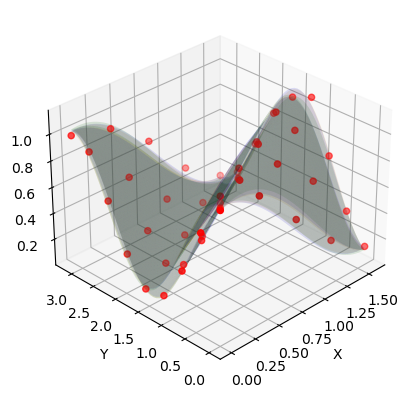

In [115]:
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
xdata, ydata = np.transpose(xydata)
ax.scatter(xdata, ydata, zdata, color='red') 
x_range = np.linspace(0, np.pi/2, 50) 
y_range = np.linspace(0, np.pi, 50) 
X, Y = np.meshgrid(x_range, y_range) 

ZG = probabilityGeneralized((X, Y), *paramsG) 
ax.plot_surface(X, Y, ZG, color='blue', alpha=0.125) 

Z = probability((X, Y), *params) 
ax.plot_surface(X, Y, Z, color='orange', alpha=0.125) 

ZS = probabilitySimplified((X, Y), *paramsS) 
ax.plot_surface(X, Y, ZS, color='green', alpha=0.125) 

ZG1 = probabilityGeneralized1((X, Y), *paramsG1) 
ax.plot_surface(X, Y, ZG1, color='blue', alpha=0.125) 

Z1 = probability1((X, Y), *params1) 
ax.plot_surface(X, Y, Z1, color='orange', alpha=0.125) 

ZS1 = probabilitySimplified1((X, Y), *paramsS1) 
ax.plot_surface(X, Y, ZS1, color='green', alpha=0.125) 


# ZS1 = probabilitySimplified1((X, Y), *paramsS1) 
# ax.plot_surface(X, Y, ZS1, color='yellow', alpha=0.25) 

ax.set_xlabel('X') 
ax.set_ylabel('Y') 
ax.set_zlabel('Z') 

ax.view_init(azim=-135, elev=30)

plt.show()

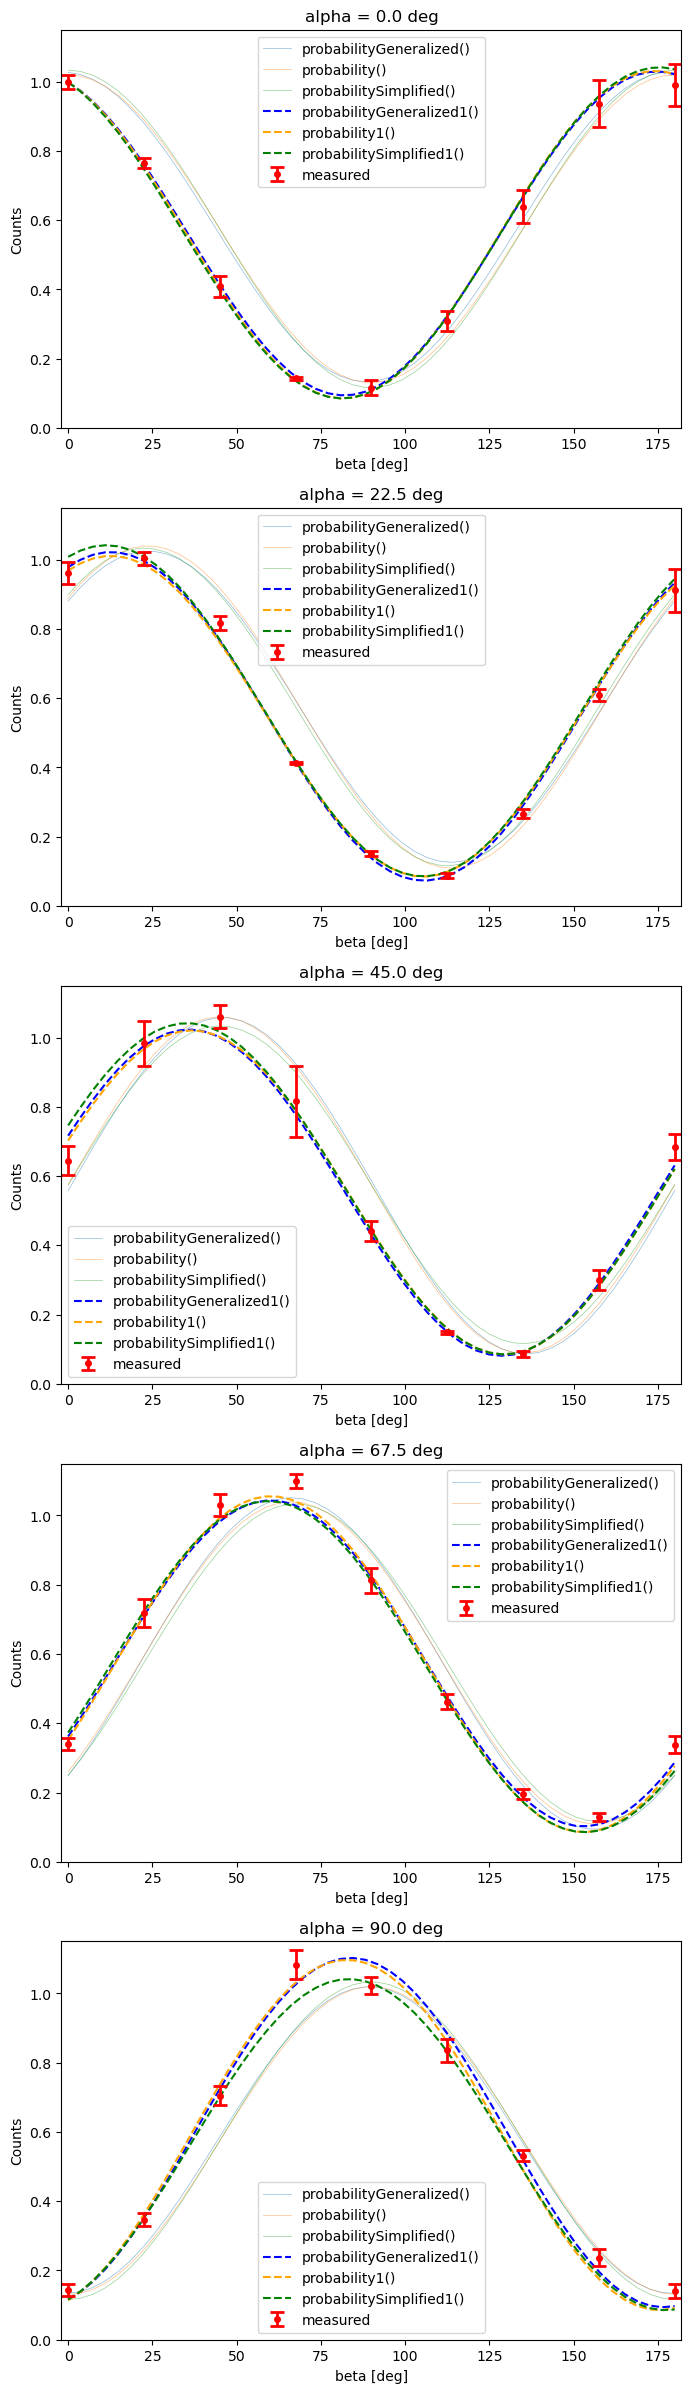

In [116]:
# Plotting coincidence counts constant alpha with varying beta

xdata, ydata = np.transpose(xydata)

fig, axs = plt.subplots(int(len(xdata)/9), 1, figsize=(8, 30))
y_values = np.linspace(0, np.pi, 50)

for i in range(int(len(xdata)/9)):
    x_value = xdata[9*i]
    x_values = np.full_like(y_values, x_value)
    probabilitiesG = probabilityGeneralized([x_values, y_values], *paramsG)
    probabilities = probability([x_values, y_values], *params)
    probabilitiesS = probabilitySimplified([x_values, y_values], *paramsS)
    probabilitiesG1 = probabilityGeneralized1([x_values, y_values], *paramsG1)
    probabilities1 = probability1([x_values, y_values], *params1)
    probabilitiesS1 = probabilitySimplified1([x_values, y_values], *paramsS1)

    zval = zdata[9*i:9*(i+1)]
    zvalerr = zerr[9*i:9*(i+1)]
    yval = ydata[9*i:9*(i+1)]*180/np.pi
    
    axs[i].plot(y_values*180/np.pi, probabilitiesG, label=f'probabilityGeneralized()', alpha = 0.5, linewidth = 0.5)
    axs[i].plot(y_values*180/np.pi, probabilities, label=f'probability()', alpha = 0.5, linewidth = 0.5)
    axs[i].plot(y_values*180/np.pi, probabilitiesS, label=f'probabilitySimplified()', alpha = 0.5, linewidth = 0.5)
    axs[i].plot(y_values*180/np.pi, probabilitiesG1, label=f'probabilityGeneralized1()', color = 'blue', linestyle = '--')
    axs[i].plot(y_values*180/np.pi, probabilities1, label=f'probability1()', color = 'orange', linestyle = '--')
    axs[i].plot(y_values*180/np.pi, probabilitiesS1, label=f'probabilitySimplified1()', color = 'green', linestyle = '--')
    axs[i].set_ylabel('Counts')
    axs[i].set_xlabel('beta [deg]')

    # axs[i].scatter(yval, zval, color='blue', label='Data Points')
    axs[i].errorbar(yval, zval, yerr=zvalerr, fmt='.', color='red', capsize=5, elinewidth=2, markeredgewidth=2, label='measured')

    axs[i].set_xlim(-2,182)
    axs[i].set_ylim(0,1.15)

    axs[i].set_title(f'alpha = {x_value*180/np.pi} deg')

    axs[i].legend()

# axs[-1].set_xlabel('beta [deg]')
# plt.suptitle('Probability Function for Constant Y')
plt.show()

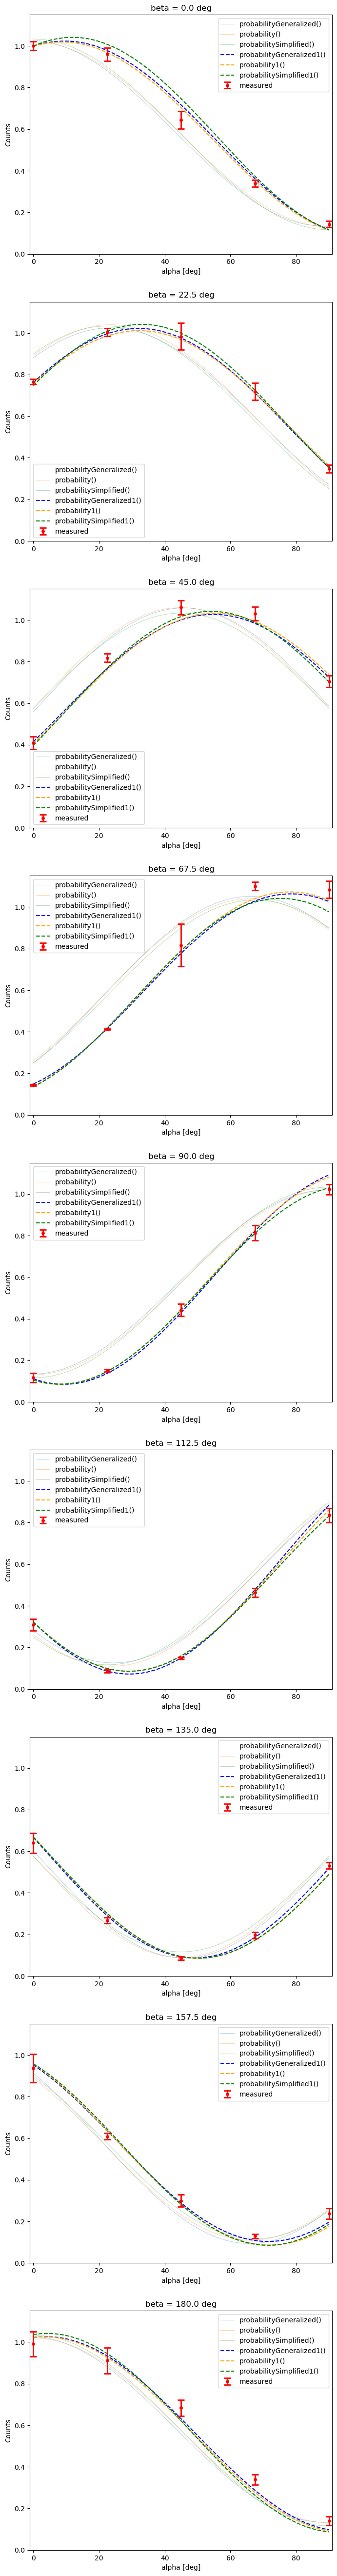

In [117]:
# Plotting coincidence counts constant beta with varying alpha

xdata, ydata = np.transpose(xydata)

fig, axs = plt.subplots(int(len(ydata)/5), 1, figsize=(8, 67.5))
x_values = np.linspace(0, np.pi/2, 50)

# Plot the probability function for each constant y
for i in range(int(len(ydata)/5)):
    y_value = ydata[i]
    y_values = np.full_like(x_values, y_value)
    probabilitiesG = probabilityGeneralized([x_values, y_values], *paramsG)
    probabilities = probability([x_values, y_values], *params)
    probabilitiesS = probabilitySimplified([x_values, y_values], *paramsS)
    probabilitiesG1 = probabilityGeneralized1([x_values, y_values], *paramsG1)
    probabilities1 = probability1([x_values, y_values], *params1)
    probabilitiesS1 = probabilitySimplified1([x_values, y_values], *paramsS1)

    zval = [zdata[i+9*j] for j in range(int(len(zdata)/9))]
    zvalerr = [zerr[i+9*j] for j in range(int(len(zerr)/9))]
    xval = [xdata[i+9*j]*180/np.pi for j in range(int(len(xdata)/9))]
    
    axs[i].plot(x_values*180/np.pi, probabilitiesG, label=f'probabilityGeneralized()', alpha = 0.5, linewidth = 0.5)
    axs[i].plot(x_values*180/np.pi, probabilities, label=f'probability()', alpha = 0.5, linewidth = 0.5)
    axs[i].plot(x_values*180/np.pi, probabilitiesS, label=f'probabilitySimplified()', alpha = 0.5, linewidth = 0.5)
    axs[i].plot(x_values*180/np.pi, probabilitiesG1, label=f'probabilityGeneralized1()', color = 'blue', linestyle = '--')
    axs[i].plot(x_values*180/np.pi, probabilities1, label=f'probability1()', color = 'orange', linestyle = '--')
    axs[i].plot(x_values*180/np.pi, probabilitiesS1, label=f'probabilitySimplified1()', color = 'green', linestyle = '--')
    axs[i].set_ylabel('Counts')
    axs[i].set_xlabel('alpha [deg]')

    # axs[i].scatter(yval, zval, color='blue', label='Data Points')
    axs[i].errorbar(xval, zval, yerr=zvalerr, fmt='.', color='red', capsize=5, elinewidth=2, markeredgewidth=2, label='measured')

    axs[i].set_xlim(-1,91)
    axs[i].set_ylim(0,1.15)

    axs[i].set_title(f'beta = {y_value*180/np.pi} deg')

    axs[i].legend()

# axs[-1].set_xlabel('alpha [deg]')
# plt.suptitle('Probability Function for Constant Y')
plt.show()

In [118]:
print(np.sum((zerrmult*infodictG1["fvec"])**2))

718.8107429196336


In [119]:
print(sum((zerrmult*infodict1["fvec"])**2))

953.5886006048522


In [120]:
print(sum((zerrmult*infodictS1["fvec"])**2))

1136.0248020779532
